## Importing library

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Loading Dataset

In [5]:
df=pd.read_csv('Titanic+Data+Set (1).csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Basic EDA 

In [21]:
df.size

10692

In [8]:
df.shape

(891, 12)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [42]:
df['Age'].dropna().median()

28.0

In [43]:
df.shape

(891, 12)

In [46]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## BOX PLOT

<Axes: >

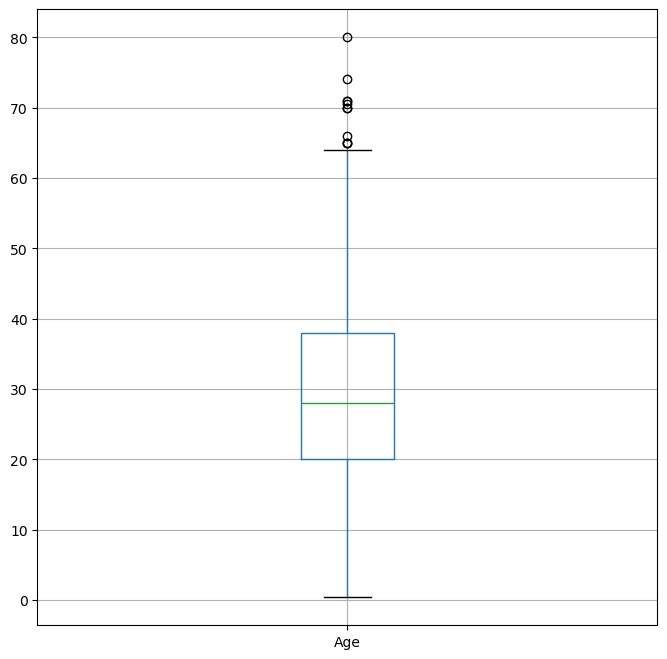

In [48]:
df.boxplot(column="Age",figsize=(8,8))

In [53]:
df['Age'].min()

0.42

In [54]:
df['Age'].max()

80.0

In [58]:
df['Age'].median()

28.0

In [55]:
df['Age'].quantile(q=0.25)

20.125

In [56]:
df['Age'].quantile(q=0.50)

28.0

In [57]:
df['Age'].quantile(q=0.75)

38.0

In [59]:
df['Age'].quantile(0.75) - df['Age'].quantile(0.25)

17.875

Text(0.7, 17.875, 'IQR')

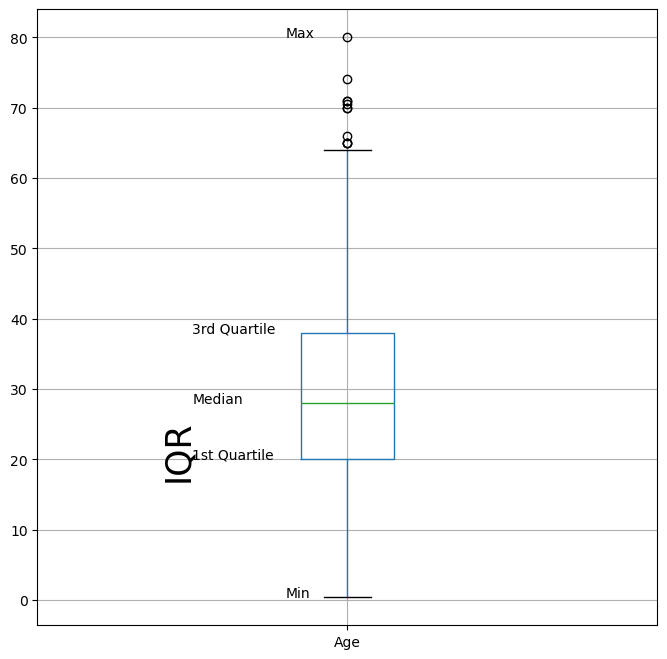

In [61]:
df.boxplot(column="Age",figsize=(8,8))

plt.text(x=0.9, y=0.42, s="Min")
plt.text(x=0.75, y=20.125, s="1st Quartile")
plt.text(x=0.75, y=28.0, s="Median")
plt.text(x=0.75, y=38.0, s="3rd Quartile")
plt.text(x=0.9, y=80.0, s="Max")
plt.text(x=0.70, y=17.875, s="IQR", rotation=90, size=25)

## Filling the missing value with median

In [65]:
df['Age'].fillna(df.Age.median(), inplace = True)

In [66]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [83]:
new_df=df.drop('Cabin',axis=1)

In [84]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [103]:
df.drop('PassengerId', axis=1 , inplace= True)

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


## Histogram

In [85]:
mean=new_df['Age'].mean()
median=new_df['Age'].median()
mode=new_df['Age'].mode()
print(mean,median,mode)


29.36158249158249 28.0 0    28.0
Name: Age, dtype: float64


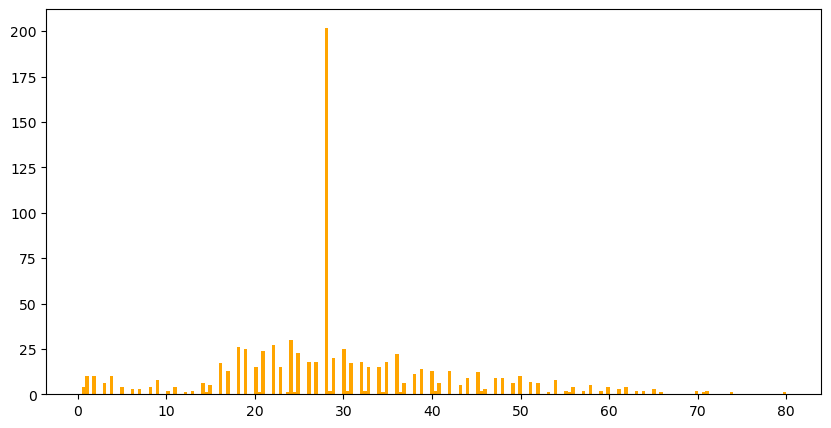

In [86]:
plt.figure(figsize = (10,5))
plt.hist(new_df['Age'],bins=200,color='orange')
plt.show()

##  Q1. From which port the maximum number of people boarded the titanic? Use an appropriate plot.

AttributeError: 'Axes' object has no attribute 'value_count'

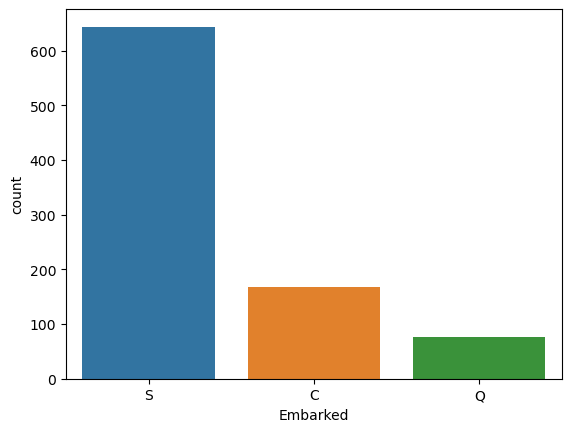

In [113]:
sns.countplot(data = df, x = 'Embarked').value_count()

# display the plot
plt.show()

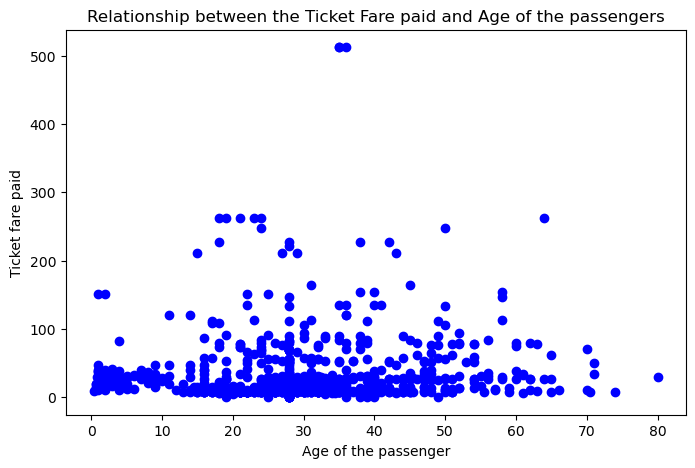

In [117]:
plt.figure(figsize=(8,5))
plt.scatter(new_df['Age'], new_df['Fare'], c="blue") # Separate columns for x and y
plt.xlabel('Age of the passenger')
plt.ylabel('Ticket fare paid')
plt.title('Relationship between the Ticket Fare paid and Age of the passengers')

plt.show()


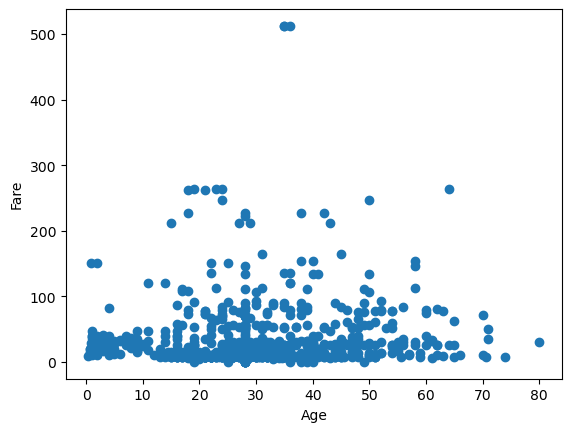

In [119]:
age= new_df['Age']
fare = new_df['Fare']
plt.xlabel("Age")
plt.ylabel("Fare")
plt.scatter(x=age,y=fare)

##  Q3. Check the distribution of age of the passengers using Histplot.

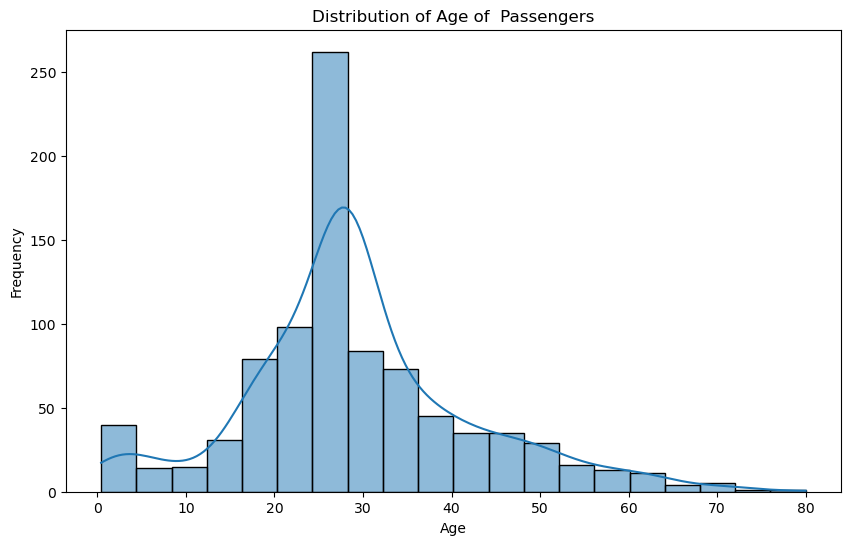

In [122]:
plt.figure(figsize=(10,6))
sns.histplot(data=new_df, x='Age', bins=20, kde= True)

plt.title('Distribution of Age of  Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## plt.hist()

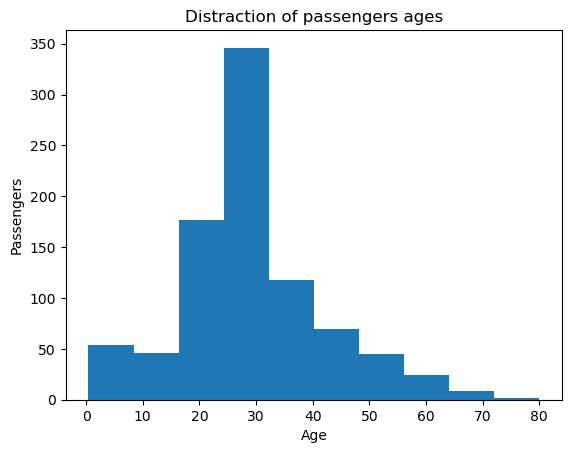

In [124]:
ages = new_df['Age']
plt.hist(ages)
plt.xlabel('Age')
plt.ylabel('Passengers')
plt.title('Distraction of passengers ages')
plt.show()

##  Q4. Check the percentage of the male and female passengers boarded the titanic.

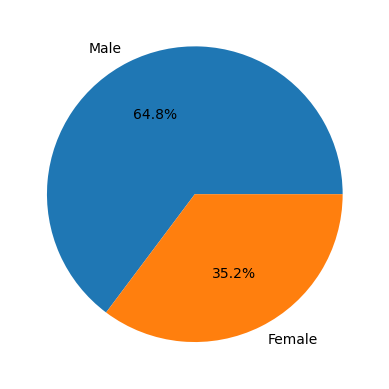

In [128]:
x= new_df['Sex'].value_counts()
plt.pie(x, labels = ['Male','Female'], autopct='%.1f%%');

# 

# 5.Check the statistical summary of the column 'Fare' using Boxplot and write your findings.

## sns.Boxplot

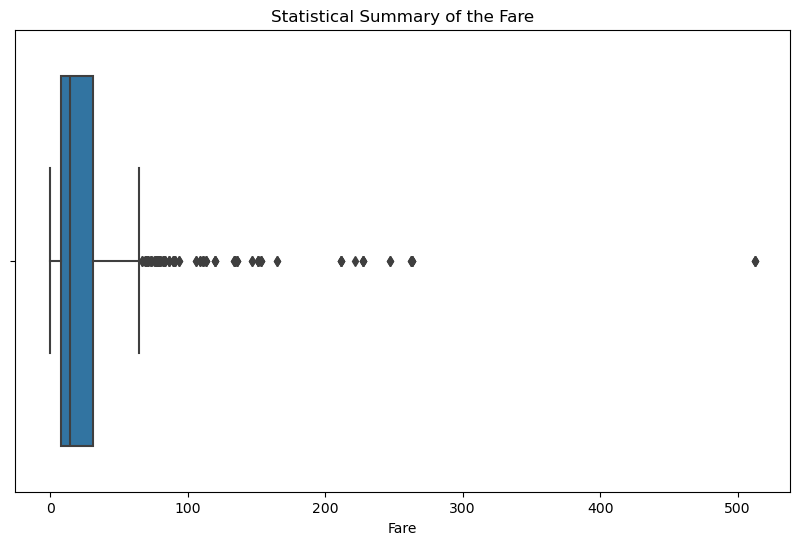

In [136]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Fare', data=new_df, orient='v')
plt.title('Statistical Summary of the Fare')
plt.xlabel('Fare')
plt.show()

## Q6. Visualize the column age of passengers using displot.

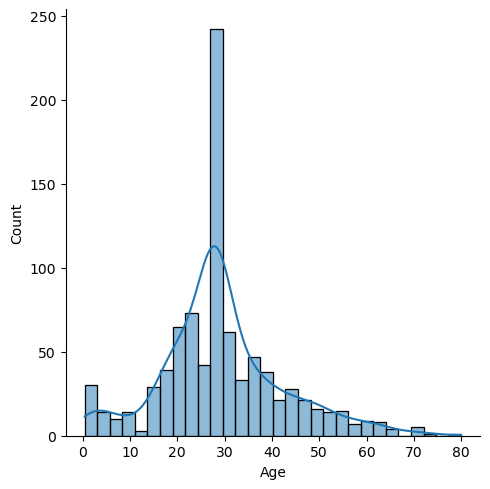

In [137]:
sns.displot(new_df['Age'],kde=True)
plt.show()

## Q7. Count the number of passengers in different classes using appropriate plot.

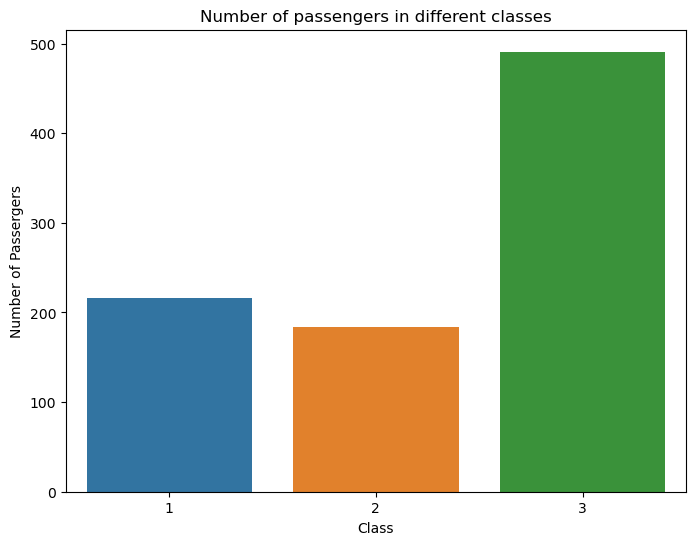

In [139]:
plt.figure(figsize=(8,6))
sns.countplot(x='Pclass', data=new_df)
plt.title('Number of passengers in different classes')
plt.xlabel('Class')
plt.ylabel('Number of Passergers')
plt.show()

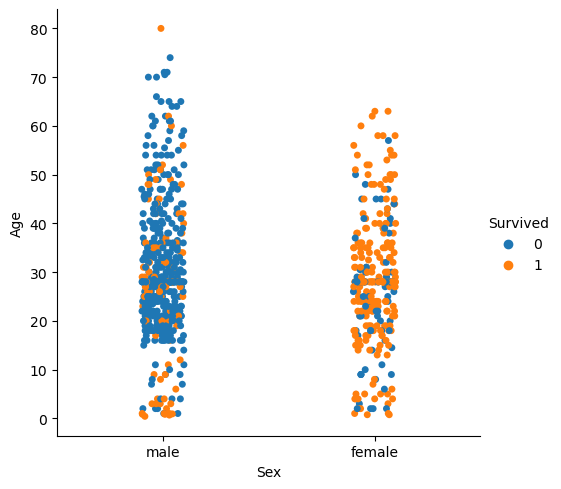

In [143]:
sns.catplot(x='Sex', y='Age', data=new_df, kind='strip', hue='Survived')
plt.show()

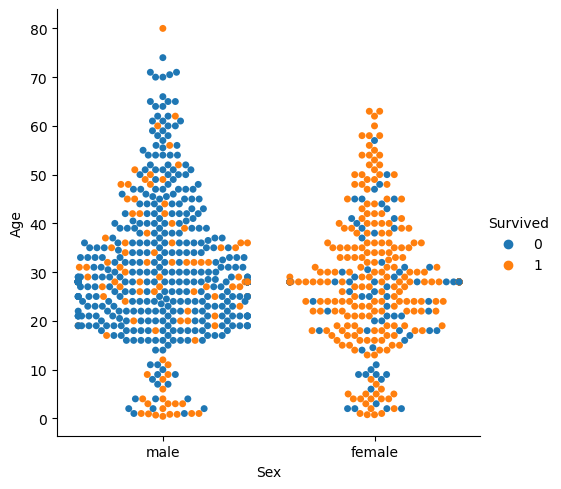

In [144]:
sns.catplot(x='Sex', y='Age', data=new_df, kind='swarm', hue='Survived')
plt.show()

AttributeError: 'numpy.int64' object has no attribute 'startswith'

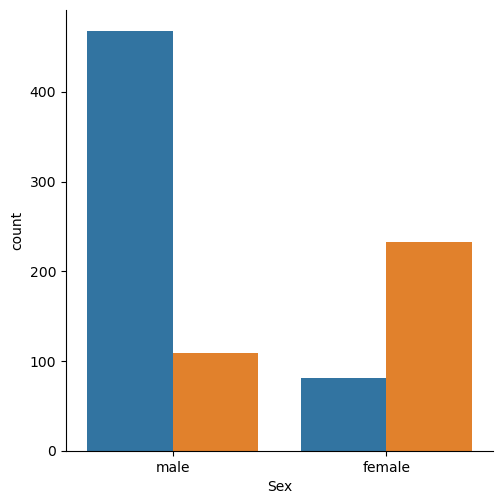

In [151]:
sns.catplot(x='Sex', hue='Survived', kind='count', data=new_df)
plt.title('Survival Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

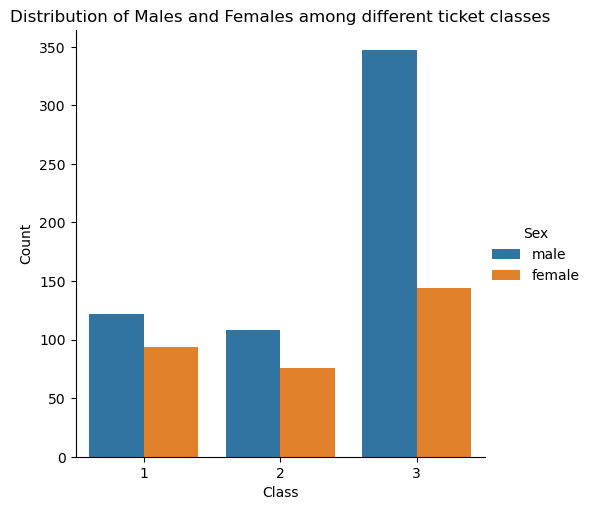

In [150]:
sns.catplot(x='Pclass', hue='Sex', kind='count', data= new_df)
plt.title('Distribution of Males and Females among different ticket classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

AttributeError: 'numpy.int64' object has no attribute 'startswith'

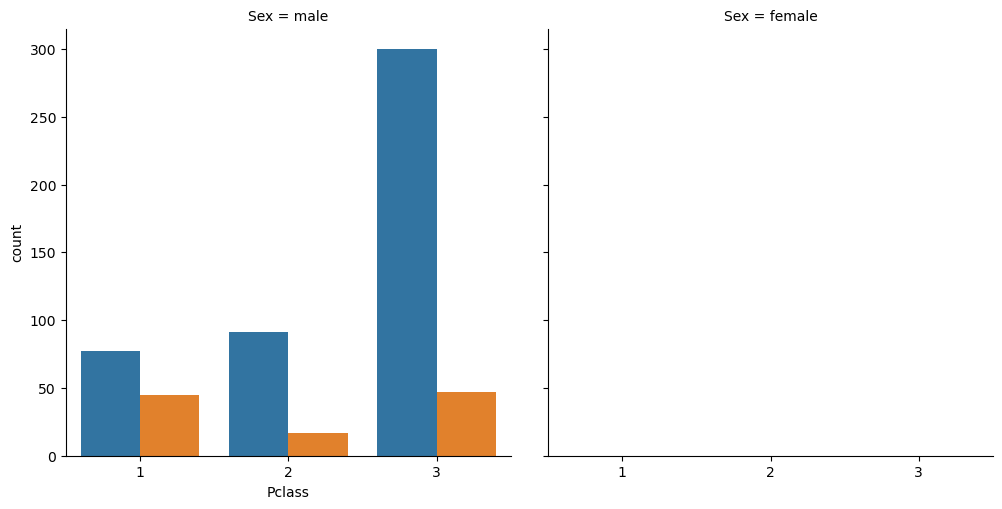

In [153]:
sns.catplot(x='Pclass', col="Sex",kind='count',data=new_df,
            hue='Survived')
plt.suptitle('Survival Count by Gender and Class', y=1.02)
plt.show()

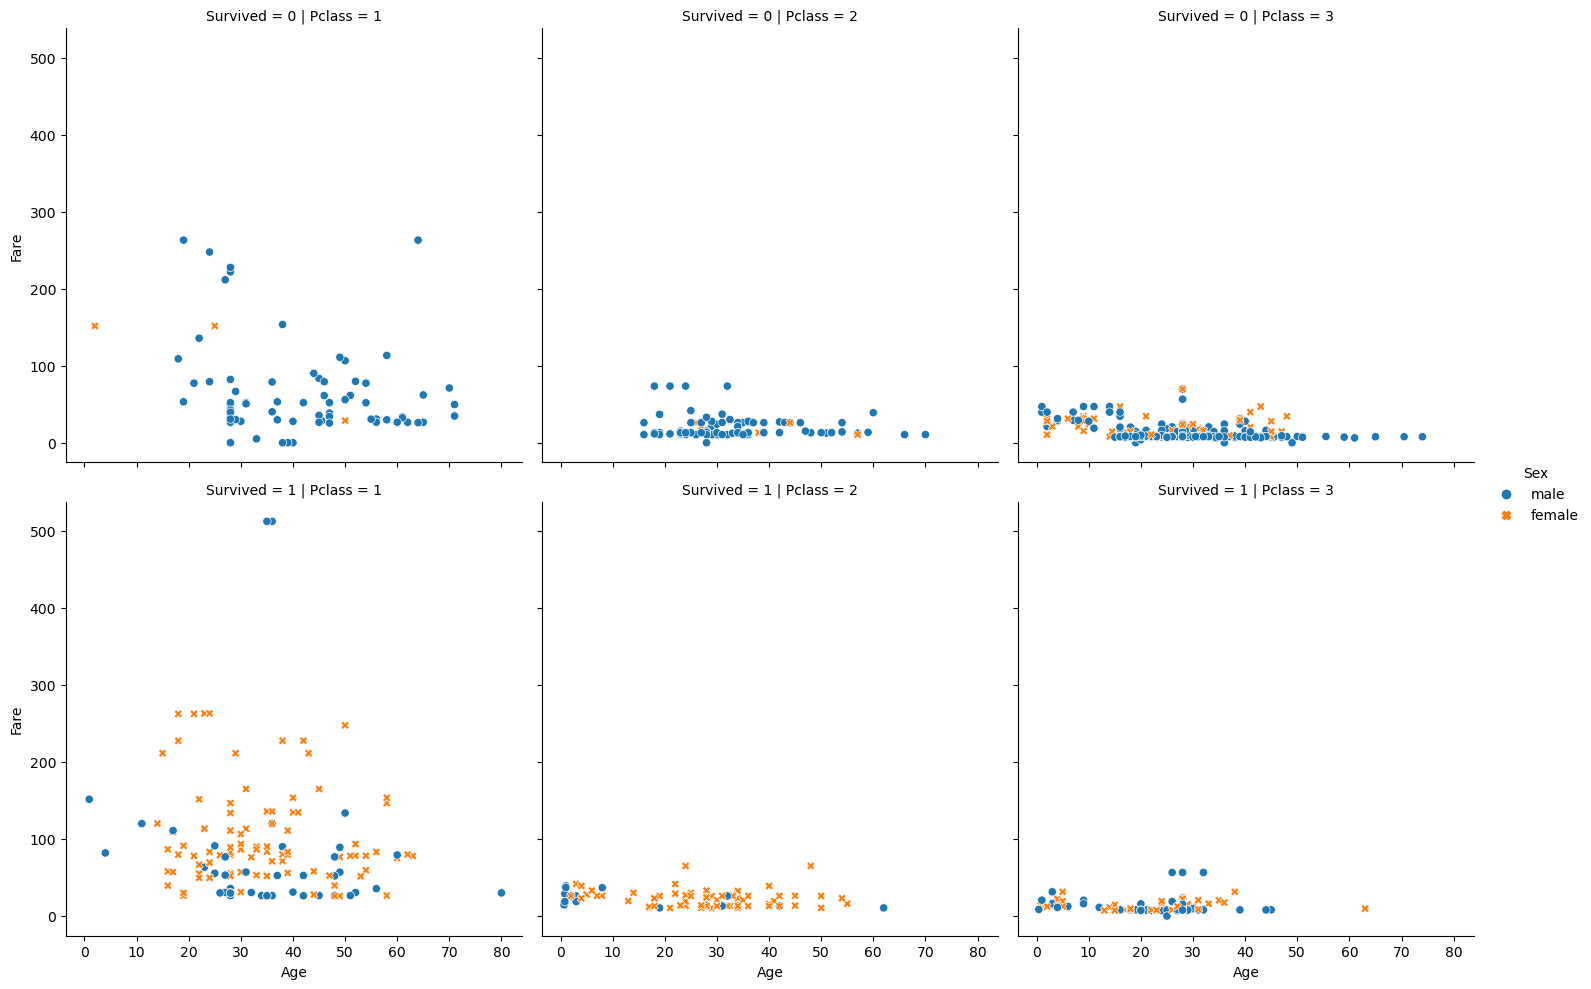

In [155]:
sns.relplot(x='Age',y='Fare', col= 'Pclass',hue='Sex', style='Sex', row='Survived',
            kind= 'scatter', data= new_df)
plt.show()


##  Q11. Check the death rate with respect to age of the passengers and three different ticket classes

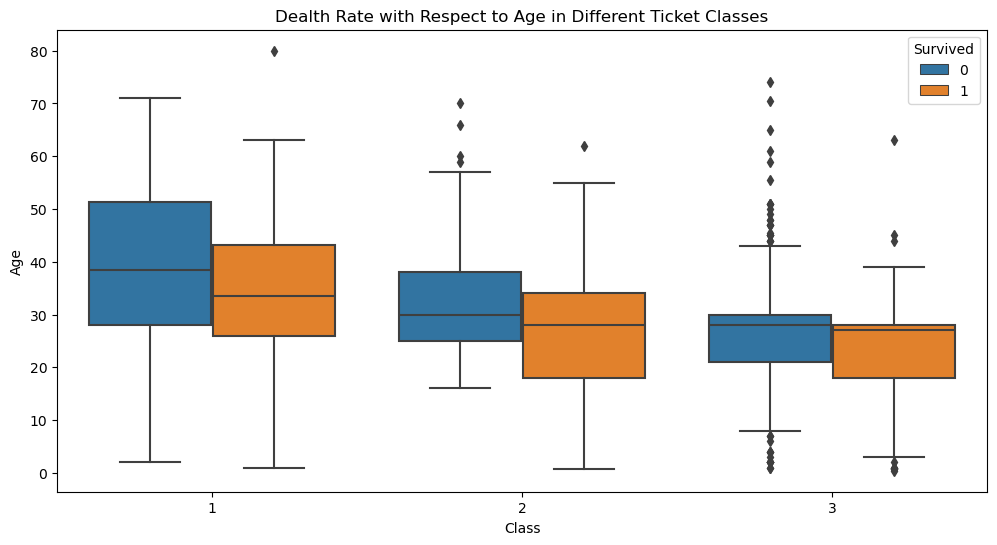

In [156]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Pclass',y='Age', hue='Survived',data=new_df)
plt.title('Dealth Rate with Respect to Age in Different Ticket Classes')
plt.xlabel('Class')
plt.ylabel('Age')
plt.show()

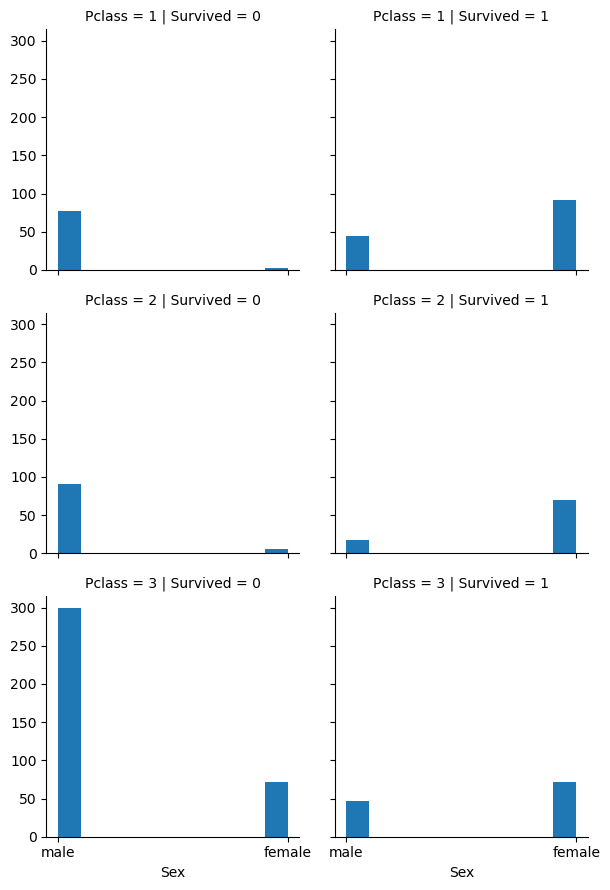

In [161]:
g= sns.FacetGrid(new_df, col='Survived', row='Pclass')
g.map(plt.hist, 'Sex')
g.add_legend()
plt.show()

In [162]:
import plotly.express as px

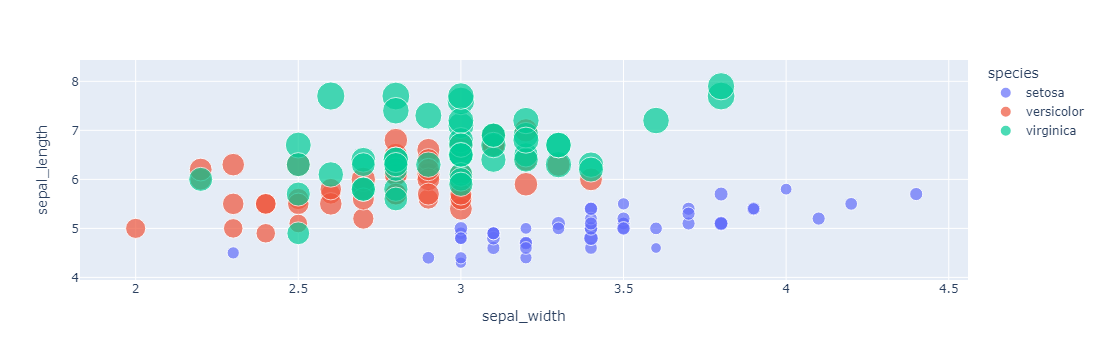

In [169]:
df = px.data.iris()
fig=px.scatter(df, x='sepal_width', y='sepal_length',
               color='species', size='petal_length')
fig.show()

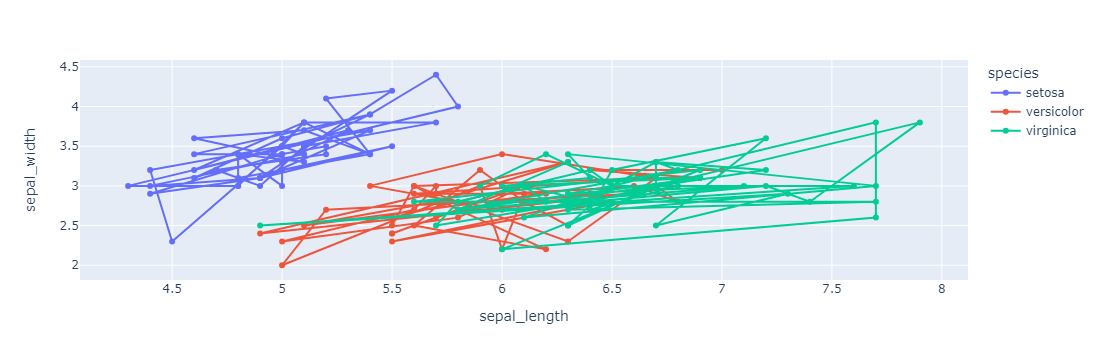

In [173]:
df = px.data.iris()
fig=px.line(df, x='sepal_length', y='sepal_width',
               color='species', markers=True)
fig.show()

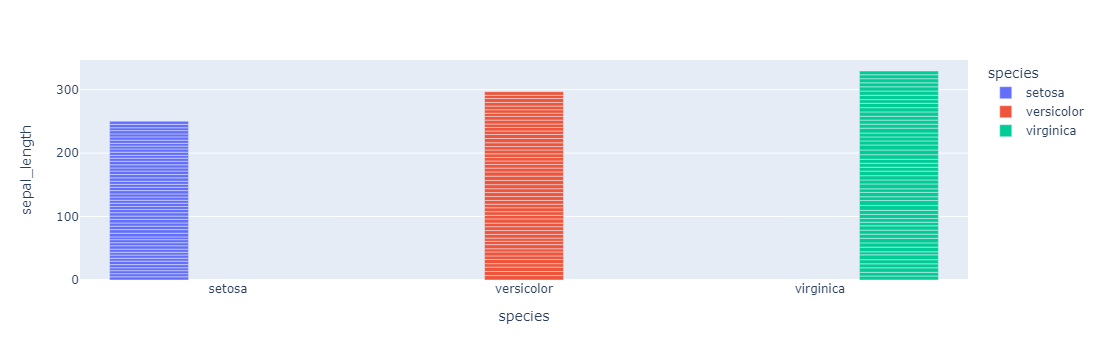

In [176]:
df = px.data.iris()
fig=px.bar(df, x='species', y='sepal_length',
               color='species', barmode='group')
fig.show()

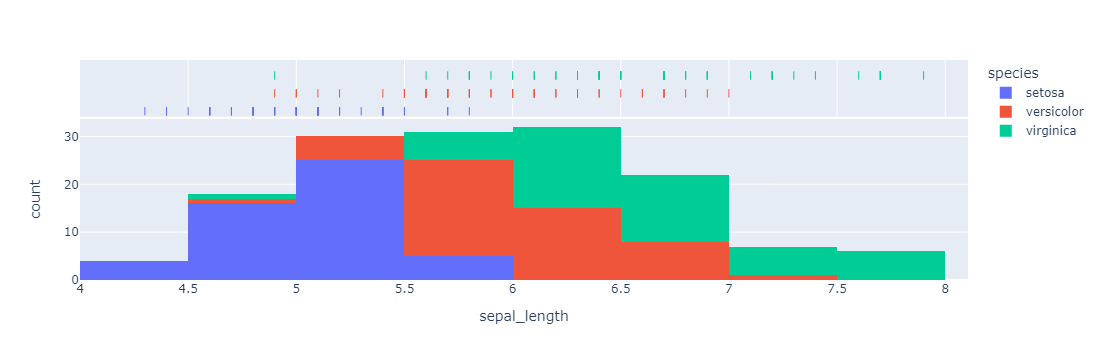

In [177]:
fig=px.histogram(df, x='sepal_length',marginal = 'rug',
               color='species')
fig.show()

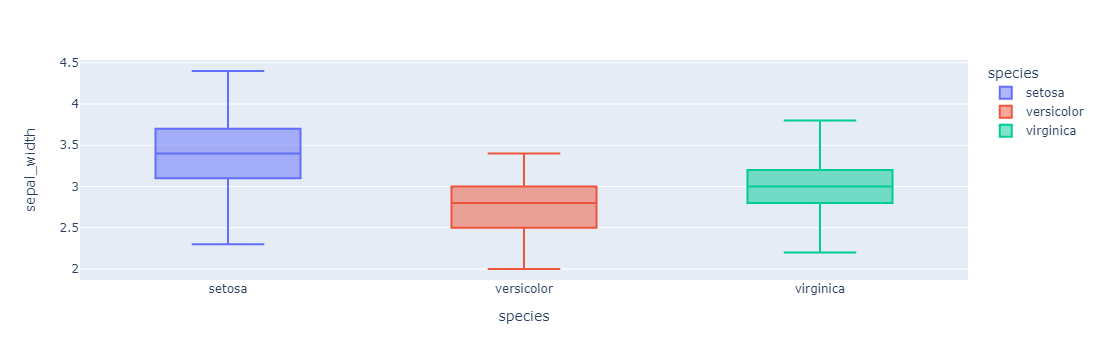

In [178]:
fig=px.box(df, x='species',y='sepal_width',
               color='species')
fig.show()